In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
def euclidean(test_sample, X):
    
    d = np.sqrt(np.sum((test_sample - X)**2, axis=1))
    
    return d

In [3]:
def choose_K(datasetX, datasetY, maxK):
    
    accuracies = []

    for k in range(3, maxK):

        predictions = KNN(datasetX, datasetY, datasetX, k)
        
        accuracy = evaluate(predictions, datasetY) 
        accuracies.append(accuracy)
        
    plot_accuracies(accuracies, maxK)
    chosenK = np.argmax(accuracies)+3
    
    print("Best Accuracy of {}% found for k={} ".format(accuracies[chosenK]*100, chosenK))
    print("So Chosen K is :",chosenK)
    
    return chosenK

In [4]:
def plot_accuracies(accuracies, maxK):

    Ks = list(range(3,maxK))
    accuracies = np.array(accuracies)
    
    plt.figure()
    plt.xlabel('K')
    plt.ylabel('Accuracy for K')
    plt.plot(Ks, accuracies, 'm', linewidth = "5")
    plt.title("Performance om different values of K")
    plt.show()

In [5]:
def get_topK_neighbors(X, Y, test_sample, K):
    # Locate the most similar neighbors
    
    distances = euclidean(test_sample, X)
    
    distances_sorted = [y for _, y in sorted(zip(distances, Y), key = lambda x: x[0])]

    return distances_sorted[:K]

In [6]:
def predict_classification(nearestNeighbors):
    
    unique, counts = np.unique(nearestNeighbors, return_counts=True)
    
    index = np.argmax(counts)
    
    return unique[index]

In [7]:
def KNN(datasetX, datasetY, X_test, K):
    
    predictions = []

    for row in X_test:
        nearestNeighbors = get_topK_neighbors(datasetX, datasetY, row, K)

        y = predict_classification(nearestNeighbors)

        predictions.append(y)
        
    return predictions

Helper functions

In [8]:
def normalize(X, bias_added=True):
    
    mu = X.mean(axis=0, keepdims=True)
    std = X.std(axis=0, keepdims=True)
    
    if bias_added==True:
        mu[0,0]=0
        std[0,0]=1
    
    X = (X-mu)/std
    
    return X, mu, std

def normalize_test(X, mu, std):
    
    X = (X-mu)/std
    
    return X

In [9]:
def evaluate(y, Y):

    accuracy = sum(y == Y) / len(Y)
    
    return round(accuracy,2)

In [10]:
def map_to_classname(y):
    
    mapping = { 0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

    results = [mapping[index] for index in y]
    
    return results
        

Run KNN

In [11]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [12]:
df = pd.DataFrame(X, columns=iris.feature_names)
df["Type of Iris"] = Y

df = df.sample(frac = 1)

In [13]:
data = np.array(df)
X = data[:,:-1]
Y = data[:,-1]

datasetX, X_test, datasetY, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
mappedY = map_to_classname(Y)
df["Type of Iris"] = mappedY

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type of Iris
93,5.0,2.3,3.3,1.0,Versicolor
46,5.1,3.8,1.6,0.2,Setosa
58,6.6,2.9,4.6,1.3,Versicolor
35,5.0,3.2,1.2,0.2,Setosa
54,6.5,2.8,4.6,1.5,Versicolor


In [16]:
print("Dataset contains {} features and {} samples ".format(df.shape[1]-1,df.shape[0]))
print("Task is to classify the Iris into 3 types: ",iris.target_names)

Dataset contains 4 features and 150 samples 
Task is to classify the Iris into 3 types:  ['setosa' 'versicolor' 'virginica']


In [17]:
datasetX, mu, std = normalize(datasetX, False)
X_test = normalize_test(X_test, mu, std)

Finding K

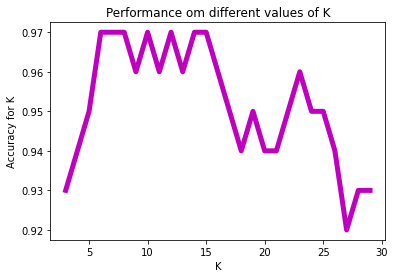

Best Accuracy of 96.0% found for k=6 
So Chosen K is : 6


In [18]:
maxK = 30
K = choose_K(datasetX, datasetY, maxK)

Performance on Test set

In [19]:
predictions = KNN(datasetX, datasetY, X_test, K)

In [20]:
accuracy = evaluate(predictions, Y_test) 

print("Accuracy on test data is: {}%".format(accuracy*100))

Accuracy on test data is: 97.0%


Predicting on a sample

In [21]:
isample = np.array([[4.5, 2.3, 1.3, 0.3]])

prediction = KNN(datasetX, datasetY, isample, K)
y = map_to_classname(prediction)

print('For data={}\nPredicted Iris type: {}'.format(isample, y[0]))

For data=[[4.5 2.3 1.3 0.3]]
Predicted Iris type: Virginica
